In [44]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

In [45]:
# Load CSV file into the df
crypto_df = pd.read_csv('Resources/crypto_data.csv')
crypto_df

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...,...
1247,XBC,BitcoinPlus,Scrypt,True,PoS,1.283270e+05,1000000
1248,DVTC,DivotyCoin,Scrypt,False,PoW/PoS,2.149121e+07,100000000
1249,GIOT,Giotto Coin,Scrypt,False,PoW/PoS,NaN,233100000
1250,OPSC,OpenSourceCoin,SHA-256,False,PoW/PoS,NaN,21000000


In [46]:
#Eliminate crypto currencies that are not being traded
crypto_df = crypto_df[crypto_df.IsTrading == True]
crypto_df

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...,...
1243,SERO,Super Zero,Ethash,True,PoW,NaN,1000000000
1244,UOS,UOS,SHA-256,True,DPoI,NaN,1000000000
1245,BDX,Beldex,CryptoNight,True,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,True,PoW,7.296538e+06,21000000


In [47]:
# Drop the IsTrading column from the dataframe
crypto_df = crypto_df.drop(columns='IsTrading')
crypto_df

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,PoW,NaN,611000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...
1243,SERO,Super Zero,Ethash,PoW,NaN,1000000000
1244,UOS,UOS,SHA-256,DPoI,NaN,1000000000
1245,BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [48]:
# Remove all rows that have at least one null value
crypto_df.dropna(inplace=True)
crypto_df


,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0
5,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
...,...,...,...,...,...,...
1238,ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
1242,GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [49]:
# Filter for cryptocurrencies that have been mined. Total coins mined should be greater than zero.
crypto_df = crypto_df[crypto_df["TotalCoinsMined"]> 0]
crypto_df

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
5,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
8,ETH,Ethereum,Ethash,PoW,1.076842e+08,0
...,...,...,...,...,...,...
1238,ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
1242,GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [50]:
# To be comprehensible to a machine learning algorithm, its data should be numeric.  
# Since the coin names do not contribute to the analysis of the data, we are deleting this column
crypto_df = crypto_df.drop(columns='CoinName', axis=1)
crypto_df

,Unnamed: 0,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,Scrypt,PoW/PoS,4.199995e+01,42
2,404,Scrypt,PoW/PoS,1.055185e+09,532000000
5,1337,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,SHA-256,PoW,1.792718e+07,21000000
8,ETH,Ethash,PoW,1.076842e+08,0
...,...,...,...,...,...
1238,ZEPH,SHA-256,DPoS,2.000000e+09,2000000000
1242,GAP,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,BDX,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Equihash,PoW,7.296538e+06,21000000


In [51]:
# Nunique ProofType
crypto_df['ProofType'].nunique()

25

In [52]:
# Nunique Algorithm
crypto_df['Algorithm'].nunique()

71

In [53]:
# Index names
crypto_df.set_index('Unnamed: 0', inplace=True)
crypto_df.index.names = ['']
crypto_df

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
,,,,
42,Scrypt,PoW/PoS,4.199995e+01,42
404,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,X13,PoW/PoS,2.927942e+10,314159265359
BTC,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethash,PoW,1.076842e+08,0
...,...,...,...,...
ZEPH,SHA-256,DPoS,2.000000e+09,2000000000
GAP,Scrypt,PoW/PoS,1.493105e+07,250000000
BDX,CryptoNight,PoW,9.802226e+08,1400222610


In [54]:
# Convert the remaining features with text values, Algorithm and ProofType, into numerical data. 
crypto_numeric_df = pd.get_dummies(crypto_df, columns=['Algorithm', 'ProofType'])
crypto_numeric_df.head(10)

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
,,,,,,,,,,,,,,,,,,,,,
42,4.199995e+01,42,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
404,1.055185e+09,532000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1337,2.927942e+10,314159265359,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
BTC,1.792718e+07,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ETH,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
LTC,6.303924e+07,84000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DASH,9.031294e+06,22000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
XMR,1.720114e+07,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ETC,1.133597e+08,210000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


    The number of rows remained the same, but the number of columns increased as we created dummies (ProofType had 25 unique values, and Algorithm had 71)

In [55]:
# Standardize your dataset so that columns that contain larger values do not unduly influence the outcome.
X_scaled = StandardScaler().fit_transform(crypto_numeric_df[['TotalCoinsMined','TotalCoinSupply']])
X_scaled

array([[-0.11710817, -0.1528703 ],
       [-0.09396955, -0.145009  ],
       [ 0.52494561,  4.48942416],
       ...,
       [-0.09561336, -0.13217937],
       [-0.11694817, -0.15255998],
       [-0.11710536, -0.15285552]])

In [56]:
X_scaled_df = crypto_numeric_df.copy()
X_scaled_df['TotalCoinsMined'] = X_scaled[:,0]
X_scaled_df['TotalCoinSupply'] = X_scaled[:,1]
X_scaled_df

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
,,,,,,,,,,,,,,,,,,,,,
42,-0.117108,-0.152870,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
404,-0.093970,-0.145009,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1337,0.524946,4.489424,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
BTC,-0.116715,-0.152560,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ETH,-0.114747,-0.152870,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZEPH,-0.073251,-0.123317,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GAP,-0.116781,-0.149176,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
BDX,-0.095613,-0.132179,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# DIMENSIONALITY REDUCTION

In [57]:
# Perform dimensionality reduction with PCA.
# Preserve 90% of the explained variance in dimensionality reduction.
pca = PCA(n_components= 0.90)
crypto_pca  = pca.fit_transform(X_scaled_df)
crypto_pca.shape

(532, 12)

    The number of the features changed to 12

In [58]:
# PCA Data into dataframe
crypto_pca_df = pd.DataFrame(
    data=crypto_pca, index=crypto_numeric_df.index
)
crypto_pca_df

,0,1,2,3,4,5,6,7,8,9,10,11
,,,,,,,,,,,,
42,-0.209276,-0.801765,0.172975,-0.672385,-0.028027,-0.027350,0.002161,-0.016859,-0.047423,-0.023043,-0.007850,0.015789
404,-0.187390,-0.804259,0.162555,-0.673029,-0.028782,-0.027213,0.002265,-0.017852,-0.047565,-0.023081,-0.007752,0.015888
1337,3.529674,-0.305537,2.915403,0.414815,-0.163323,-0.259278,-0.278472,-0.152434,0.747395,0.360814,-0.233801,-0.070220
BTC,-0.180157,0.694290,-0.165771,0.239931,-0.278380,-0.614707,0.624124,-0.015063,0.027769,0.009259,-0.026164,-0.026461
ETH,-0.173289,0.688569,-0.154390,0.131918,-0.212548,-0.104388,-0.242103,0.002800,0.113068,-0.125626,0.058157,-0.129333
...,...,...,...,...,...,...,...,...,...,...,...,...
ZEPH,-0.108902,-0.046517,-0.116900,0.467190,0.034621,-0.668186,0.576375,0.831228,-0.120427,0.240369,-0.164298,-0.063213
GAP,-0.206436,-0.801391,0.175309,-0.672233,-0.027869,-0.027316,0.002264,-0.016786,-0.047284,-0.023163,-0.007821,0.015774
BDX,-0.124589,0.736198,-0.090418,0.144735,-0.240199,-0.126672,-0.350559,-0.273663,-0.698662,0.430965,-0.085360,0.070798


In [59]:
# Reduce the dataset dimensions with t-SNE and visually inspect the results
# Initialize t-SNE model 
tsne = TSNE(learning_rate=35)

# run t-SNE on the principal components
tsne_features = tsne.fit_transform(crypto_pca_df)
tsne_features

array([[-23.110418  ,   0.36796224],
       [-18.036903  ,  -3.2513258 ],
       [ -5.741075  ,   4.593768  ],
       ...,
       [  5.2835093 ,  14.506579  ],
       [ 17.996483  ,  11.598135  ],
       [ -4.868924  ,  -4.053532  ]], dtype=float32)

In [60]:
# Create a scatter plot of the t-SNE output
tsne_df = pd.DataFrame(tsne_features, columns=['x','y'])
tsne_df

,x,y
0,-23.110418,0.367962
1,-18.036903,-3.251326
2,-5.741075,4.593768
3,7.539454,29.511286
4,15.057511,18.300329
...,...,...
527,6.115390,4.417429
528,-21.334877,-4.332996
529,5.283509,14.506579
530,17.996483,11.598135


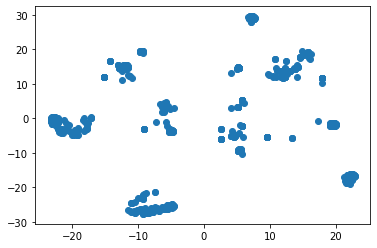

In [61]:
# plot
plt.scatter(tsne_df['x'], tsne_df['y'])
plt.show()

# Cluster Analysis with k-Means

In [62]:
# Create an elbow plot to identify the best number of clusters.

inertia = []
k = list(range(1, 11))

# for-loop to determine the inertia for each `k` between 1 through 10
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(tsne_df)
    inertia.append(km.inertia_)

# Create the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow

,k,inertia
0,1,221237.625000
1,2,131871.796875
2,3,76623.007812
3,4,43626.328125
4,5,30943.158203
5,6,18616.878906
6,7,13793.963867
7,8,10089.057617
8,9,6448.046875
9,10,5055.649414


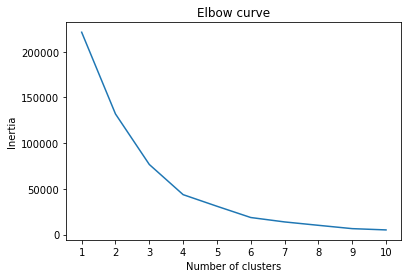

In [63]:
# Plot the elbow curve to find the best candidate(s) for k
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve')
plt.show()

In [70]:
# Initialize the k-means model. 
# Use K number = 4, elbow of the curve - the point after which the inertia start decreasing in a linear fashion. 
model = KMeans(n_clusters = 4, random_state=0)
model.fit(tsne_features)

KMeans(n_clusters=4, random_state=0)

In [71]:
# Predicting clusters
predictions = model.predict(tsne_features)
predictions

array([0, 0, 0, 1, 1, 3, 2, 1, 1, 1, 2, 1, 0, 2, 3, 0, 2, 3, 0, 0, 1, 0,
       1, 3, 3, 0, 1, 1, 3, 0, 3, 0, 3, 2, 0, 0, 1, 1, 3, 3, 3, 3, 2, 0,
       3, 1, 3, 3, 3, 0, 2, 0, 2, 1, 3, 3, 3, 0, 3, 1, 0, 3, 0, 0, 0, 3,
       1, 3, 0, 0, 0, 0, 0, 3, 3, 3, 2, 2, 1, 2, 1, 2, 2, 1, 1, 1, 2, 0,
       0, 3, 0, 1, 3, 2, 2, 1, 0, 0, 0, 1, 2, 2, 3, 0, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 0, 3, 1, 2, 1, 1, 3, 0, 3, 1, 3, 1, 3, 2, 2, 2, 1, 1, 0,
       2, 2, 3, 3, 0, 1, 0, 1, 0, 0, 2, 1, 0, 3, 1, 0, 2, 3, 0, 1, 0, 0,
       0, 2, 1, 3, 1, 2, 0, 0, 0, 2, 3, 2, 2, 0, 0, 0, 2, 3, 2, 0, 0, 0,
       2, 2, 2, 1, 2, 0, 1, 0, 1, 2, 0, 1, 0, 3, 0, 1, 0, 3, 0, 2, 0, 2,
       1, 2, 2, 0, 2, 0, 1, 1, 1, 2, 3, 2, 0, 2, 2, 0, 0, 2, 2, 2, 0, 0,
       2, 0, 0, 2, 1, 0, 0, 0, 0, 2, 0, 3, 1, 1, 0, 0, 2, 0, 2, 0, 1, 0,
       0, 3, 2, 2, 1, 0, 3, 1, 0, 1, 2, 0, 2, 3, 2, 2, 1, 2, 2, 0, 0, 0,
       2, 2, 3, 0, 1, 2, 0, 0, 2, 3, 2, 1, 0, 1, 1, 1, 1, 0, 2, 0, 0, 3,
       0, 3, 2, 2, 0, 1, 0, 1, 0, 1, 2, 2, 0, 1, 2,

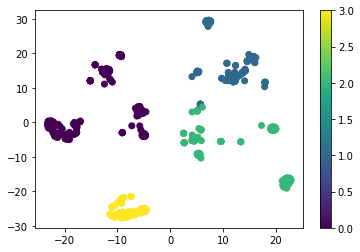

In [72]:
# TSNE Reduced Dimensions & colorcode them with the labels
plt.scatter(tsne_features[:, 0], tsne_features[:,1], c = model.labels_ )
plt.colorbar()
plt.show()

     Visualizing the plot from tsne and the K-means elbow curve, I believe that there are cluters of traded crypto currencies. I believe the model with 4 clusters will give us the most optimal results.